In [4]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
Oberlin_game = pd.read_csv("Game 11 Oberlin.xlsx - Oberlin.csv")
Oberlin_game = Oberlin_game.loc[:, Oberlin_game.columns != 'Player Name']

In [6]:
Oberlin_full = Oberlin_game[Oberlin_game['Split Name']== 'game']
Oberlin_full

,Session Title,Player Code,Minutes Played,Split Name,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,Hr Load,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Oberlin,L,90.0,game,6.3902,547.2501,54,1113.7599,2,0,...,0,339,182,55,11,0,263,165,69,33
1,Oberlin,K,90.0,game,5.6081,538.2136,44,1039.6203,0,0,...,0,245,138,39,12,0,230,113,57,30
2,Oberlin,J,18.0,game,1.3722,66.4423,10,269.8084,0,0,...,0,55,34,11,5,0,53,36,11,8
3,Oberlin,N,0.0,game,0.1440,0.0000,0,24.0481,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Oberlin,O,12.0,game,1.1044,188.9507,17,165.6570,0,0,...,0,32,36,13,3,0,46,28,11,6
5,Oberlin,F,45.0,game,1.4227,0.0000,2,252.0398,1,0,...,0,43,18,5,1,0,45,10,2,5
6,Oberlin,R,90.0,game,6.4137,520.4545,45,1092.1401,0,0,...,0,314,148,32,6,0,227,140,68,21
7,Oberlin,G,14.0,game,1.0970,162.0249,14,181.1718,0,0,...,0,24,30,7,0,0,41,17,5,4
8,Oberlin,E,10.0,game,0.9554,46.1449,5,190.1955,0,0,...,0,40,25,12,2,0,43,26,7,3
9,Oberlin,A,0.0,game,0.2159,0.0000,0,32.2903,0,0,...,0,1,1,0,0,0,1,1,0,0


In [7]:
Oberlin_volume_intensity = Oberlin_full[["Player Code", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [8]:
Oberlin_cluster = Oberlin_volume_intensity.loc[:, Oberlin_volume_intensity.columns != 'Player Code']

In [9]:
Oberlin_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Oberlin_cluster)
    Oberlin_distortions.append(kmeanModel.inertia_)


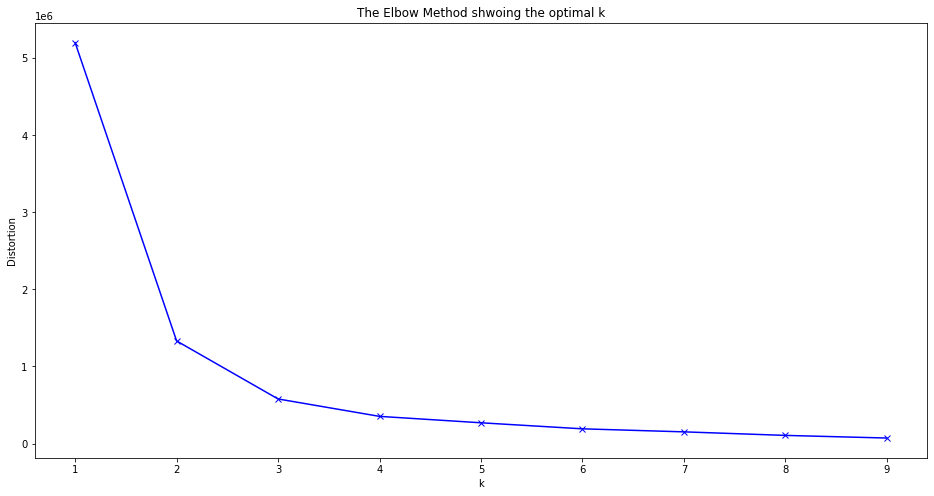

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, Oberlin_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [14]:
x_Oberlin = Oberlin_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Oberlin)
X_norm = pd.DataFrame(x_scaled)

In [16]:
pca_Oberlin= PCA(n_components = 2) # 2D PCA for the plot
reduced_Oberlin= pd.DataFrame(pca_Oberlin.fit_transform(X_norm))

In [17]:
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Oberlin)
# get the cluster labels
labels = kmeans.predict(reduced_Oberlin)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Oberlin_names = Oberlin_full['Player Code']

In [18]:
reduced_Oberlin['cluster'] = clusters
reduced_Oberlin['names'] = Oberlin_names
reduced_Oberlin.columns = ['x', 'y', 'cluster', 'names']
reduced_Oberlin.head()

,x,y,cluster,names
0,1.446825,0.420356,2,L
1,1.120555,-0.194892,2,K
2,-0.781880,-0.056641,1,J
3,-1.472401,-0.231102,1,N
4,-0.852632,-0.052456,1,O


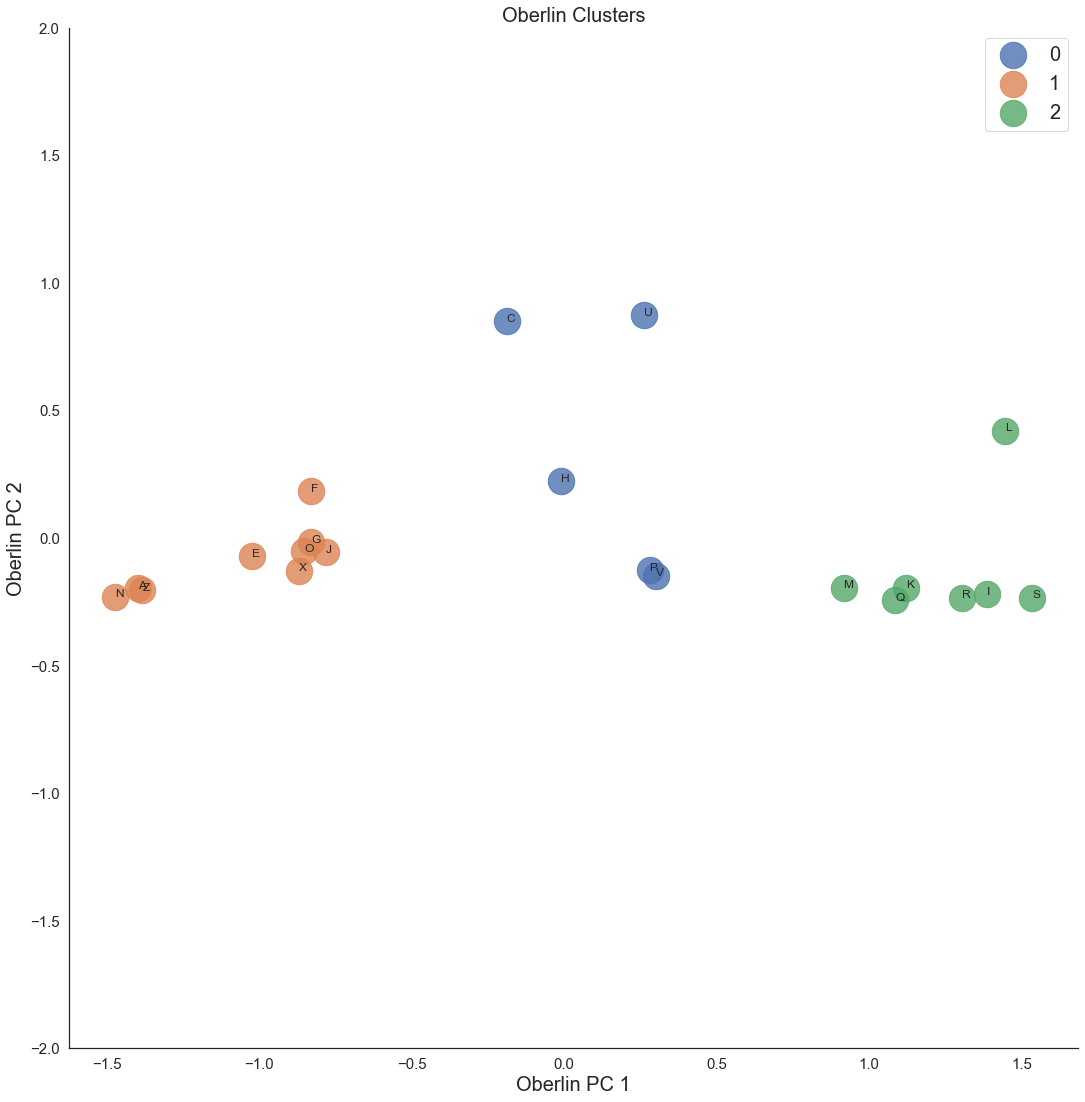

In [28]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Oberlin, legend= False,
fit_reg=False, height = 15, scatter_kws={"s": 700})
texts = []
for x, y, s in zip(reduced_Oberlin.x, reduced_Oberlin.y, reduced_Oberlin.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Oberlin PC 1", fontsize = 20)
plt.ylabel("Oberlin PC 2", fontsize = 20)
plt.title('Oberlin Clusters', fontsize=20)
plt.legend(fontsize = 20)
plt.show()

In [20]:
Oberlin_group_0 = reduced_Oberlin[(reduced_Oberlin['cluster'] == 0)]
Oberlin_group_0
#Postions: U(MF) C(MF) V(MF) H(F) P(F)

,x,y,cluster,names
10,0.262846,0.872797,0,U
11,-0.187957,0.850408,0,C
16,0.301756,-0.147824,0,V
19,-0.010170,0.223032,0,H
20,0.280116,-0.125475,0,P


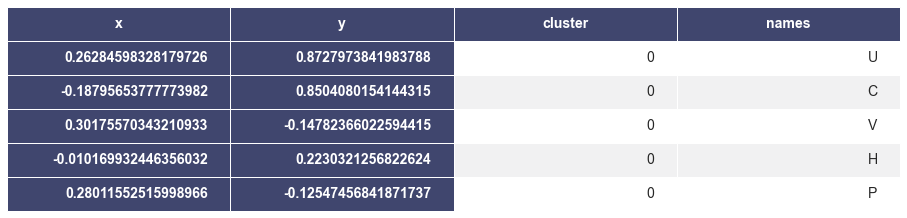

In [31]:
df = Oberlin_group_0


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [21]:
Oberlin_group_1 = reduced_Oberlin[(reduced_Oberlin['cluster'] == 1)]
Oberlin_group_1
# Postions: J(F) N(F) O(F) G(F) E(MF) A(D) X(GK) Z(F)

,x,y,cluster,names
2,-0.781880,-0.056641,1,J
3,-1.472401,-0.231102,1,N
4,-0.852632,-0.052456,1,O
5,-0.831063,0.183941,1,F
7,-0.829119,-0.016158,1,G
8,-1.024413,-0.071988,1,E
9,-1.397658,-0.196666,1,A
12,-0.868368,-0.127449,1,X
15,-1.383544,-0.205082,1,Z


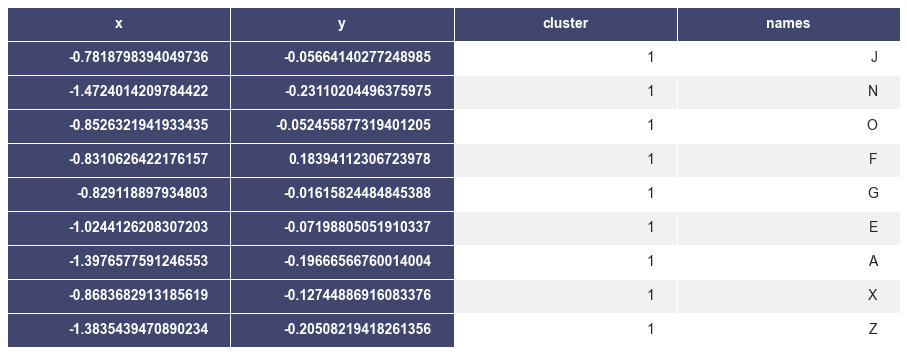

In [32]:
import six
df = Oberlin_group_1


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [22]:
Oberlin_group_2 = reduced_Oberlin[(reduced_Oberlin['cluster'] == 2)]
Oberlin_group_2
#Positions: L(D) K(D) R(D) I(F) Q(MF) S(MF) M(D)

,x,y,cluster,names
0,1.446825,0.420356,2,L
1,1.120555,-0.194892,2,K
6,1.303892,-0.233260,2,R
13,1.386193,-0.220038,2,I
14,1.085576,-0.242460,2,Q
17,1.535262,-0.233796,2,S
18,0.916184,-0.195249,2,M


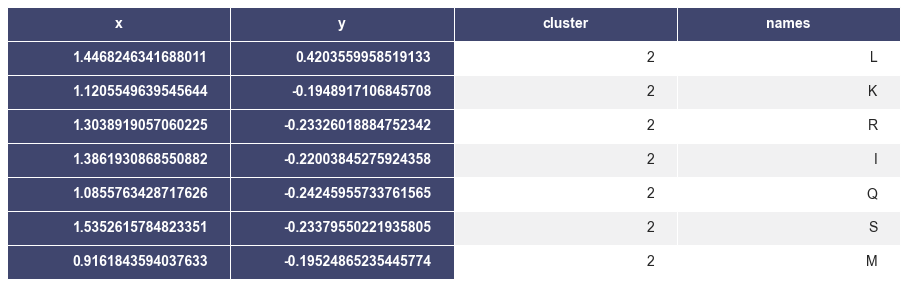

In [33]:
df = Oberlin_group_2


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)